In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
import pandas as pd

train = pd.read_csv("train_df_errno.csv")
test = pd.read_csv("test_df.csv")
sub = pd.read_csv("sample_submission.csv")
age = pd.read_csv("age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2896, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
age.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

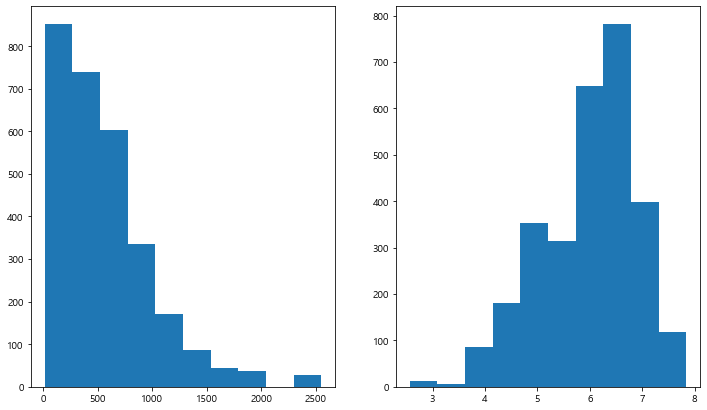

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

### 결측치 확인하기

In [6]:
train.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      4
단지내주차면수         0
등록차량수           0
dtype: int64

In [7]:
test.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         180
임대료           180
10분내지하철수       38
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

## 1.test데이터셋 자격유형 mapping

In [8]:
test[test['자격유형'].isna()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0


In [9]:
test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         180
임대료           180
10분내지하철수       38
10분내버스정류장수      0
단지내주차면수         0
dtype: int64

In [10]:
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

## 2.10분버스정류장수 결측치 처리

In [11]:
train_df.loc[train_df['10분내버스정류장수'].isnull(),:]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,NaN,1066.0,1214.0
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,NaN,1066.0,1214.0


In [12]:
train_df['10분내버스정류장수'].value_counts()

2.0     776
3.0     737
4.0     485
1.0     270
5.0     162
6.0     153
8.0      99
10.0     80
7.0      65
12.0     22
20.0     15
15.0     11
16.0      6
19.0      4
11.0      3
14.0      2
0.0       2
Name: 10분내버스정류장수, dtype: int64

In [13]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

3.996268656716418

In [14]:
# 데이터 확인 후,
train_df.loc[ train_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val
test_df.loc[ test_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

## 3.자격유형 mapping처리

In [15]:
print(train_df.자격유형.unique())
print(test_df.자격유형.unique())
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5,
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10,
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }
train_df['자격유형'] =train_df['자격유형'].map(mapping).astype(int)
test_df['자격유형'] =test_df['자격유형'].map(mapping).astype(int)
train_df.head()

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']
['H' 'A' 'E' 'C' 'D' 'G' 'I' 'J' 'K' 'L' 'M' 'N']


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,149760,0.0,3.0,624.0,205.0


## 4.10분내지하철수결측치 처리

In [16]:
train_df['10분내지하철수'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [17]:
print(train_df['10분내지하철수'].value_counts())

0.0    2246
1.0     400
2.0      33
3.0       6
Name: 10분내지하철수, dtype: int64


In [18]:
#결측치 처리
train_df['10분내지하철수'] = train_df['10분내지하철수'].fillna(0.0)
test_df['10분내지하철수'] = test_df['10분내지하철수'].fillna(0.0)

## 5.임대보증금 결측치 처리하기

In [19]:
train_df.loc[ train_df['임대보증금'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,4,NaN,NaN,0.0,4.0,117.0,75.0
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,4,NaN,NaN,0.0,4.0,117.0,75.0
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,4,NaN,NaN,0.0,4.0,117.0,75.0
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,4,NaN,NaN,0.0,4.0,117.0,75.0
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,4,NaN,NaN,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,4,NaN,NaN,0.0,6.0,1636.0,2315.0
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,4,NaN,NaN,0.0,6.0,1636.0,2315.0
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,4,NaN,NaN,0.0,6.0,1636.0,2315.0
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,4,NaN,NaN,0.0,6.0,1636.0,2315.0


In [20]:
train_df["임대보증금"] = train_df["임대보증금"].fillna(0)
train_df.loc[train_df["임대보증금"] == "-", "임대보증금"] = 0
train_df["임대보증금"] = train_df["임대보증금"].astype(int)

In [21]:
test_df["임대보증금"] = test_df["임대보증금"].fillna(0)
test_df.loc[test_df["임대보증금"] == "-", "임대보증금"] = 0
test_df["임대보증금"] = test_df["임대보증금"].astype(int)

In [22]:
grouped = train_df.groupby( '지역')['임대보증금']
a=grouped.mean()
a.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='지역')

In [23]:
tra=[]
for i in a.index:
    tra.append(i)
tra

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [24]:
grouped = train_df.groupby([ '지역'])
for val in tra:
    group1 = grouped.get_group( ( val )  )
    imde = train_df[(train_df["임대보증금"] == 0) & (train_df["지역"] == val)].index
    train_df.loc[imde, "임대보증금"] = group1['임대보증금'].mean()

In [25]:
grouped = test_df.groupby( '지역')['임대보증금']
a=grouped.mean()
a.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='지역')

In [26]:
tes=[]
for i in a.index:
    tes.append(i)
tes

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '세종특별자치시',
 '울산광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [27]:
grouped = test_df.groupby([ '지역'])
for val in tes:
    group1 = grouped.get_group( ( val )  )
    imde = test_df[(train_df["임대보증금"] == 0) & (test_df["지역"] == val)].index
    test_df.loc[imde, "임대보증금"] = group1['임대보증금'].mean()

<ipython-input-27-588d90e9acdd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imde = test_df[(train_df["임대보증금"] == 0) & (test_df["지역"] == val)].index
<ipython-input-27-588d90e9acdd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imde = test_df[(train_df["임대보증금"] == 0) & (test_df["지역"] == val)].index
<ipython-input-27-588d90e9acdd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imde = test_df[(train_df["임대보증금"] == 0) & (test_df["지역"] == val)].index
<ipython-input-27-588d90e9acdd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imde = test_df[(train_df["임대보증금"] == 0) & (test_df["지역"] == val)].index
<ipython-input-27-588d90e9acdd>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imde = test_df[(train_df["임대보증금"] == 0) & (test_df["지역"] == val)].index
<ipython-input-27-588d90e9acdd>:4: UserWarning: Boolean Series key will be 

## 6.임대료 결측치 처리하기

In [28]:
train_df["임대료"] = train_df["임대료"].fillna(0)
train_df.loc[train_df["임대료"] == "-", "임대료"] = 0
train_df["임대료"] = train_df["임대료"].astype(int)

In [29]:
test_df["임대료"] = test_df["임대료"].fillna(0)
test_df.loc[test_df["임대료"] == "-", "임대료"] = 0
test_df["임대료"] = test_df["임대료"].astype(int)

In [30]:
grouped = train_df.groupby([ '지역'])
for val in tra:
    group1 = grouped.get_group( ( val )  )
    imde = train_df[(train_df["임대료"] == 0) & (train_df["지역"] == val)].index
    train_df.loc[imde, "임대료"] = group1['임대료'].mean()

In [31]:
grouped = test_df.groupby([ '지역'])
for val in tes:
    group1 = grouped.get_group( ( val )  )
    imde = test_df[(test_df["임대료"] == 0) & (test_df["지역"] == val)].index
    test_df.loc[imde, "임대료"] = group1['임대료'].mean()

## 7.임대건물구분,지역,공급유형 숫자로 mapping

In [32]:
all_df = pd.concat([train_df, test_df], join='inner')
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000.0,82940.000000,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000.0,107130.000000,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000.0,107130.000000,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000.0,149760.000000,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000.0,149760.000000,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0.0,151825.647059,0.0,1.0,467.0
1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000.0,106400.000000,0.0,2.0,300.0
1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000.0,106400.000000,0.0,2.0,300.0
1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000.0,144600.000000,0.0,2.0,300.0


In [33]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000.0,82940.000000,0.0,3.0,624.0,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000.0,107130.000000,0.0,3.0,624.0,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000.0,107130.000000,0.0,3.0,624.0,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000.0,149760.000000,0.0,3.0,624.0,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000.0,149760.000000,0.0,3.0,624.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,12,0.0,151825.647059,0.0,1.0,467.0,1,1,9
1004,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,8,6872000.0,106400.000000,0.0,2.0,300.0,1,4,1
1005,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,8,6872000.0,106400.000000,0.0,2.0,300.0,1,4,1
1006,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,8,13410000.0,144600.000000,0.0,2.0,300.0,1,4,1


In [34]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False)
all_df.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276.0,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1
5,C2515,545,아파트,경상남도,국민임대,51.97,106.0,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,1,1,1,492,1
6,C2515,545,아파트,경상남도,국민임대,51.97,26.0,17.0,1,23042000.0,190090.0,0.0,3.0,624.0,1,1,1,492,1
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,1,2,1,131,3
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,1,2,1,131,3
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34.0,13.0,1,15620000.0,127350.0,1.0,1.0,1285.0,1,2,1,131,3


In [35]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [36]:
group2 =['C1490', 'C2497', 'C2620', 'C1344', 'C1024','C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
    all_df.loc[ all_df['단지코드'] == one2, "단지코드_Type" ] = 2

In [37]:
all_df['단지코드_Type'].unique()

array([nan,  1.,  2.])

In [38]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

In [39]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type
0,C2515,545,33.48,276.0,17.0,1,9216000.0,82940.000000,0.0,3.0,624.0,1,1,1,492,1,3.0
1,C2515,545,39.60,60.0,17.0,1,12672000.0,107130.000000,0.0,3.0,624.0,1,1,1,492,1,3.0
2,C2515,545,39.60,20.0,17.0,1,12672000.0,107130.000000,0.0,3.0,624.0,1,1,1,492,1,3.0
3,C2515,545,46.90,38.0,17.0,1,18433000.0,149760.000000,0.0,3.0,624.0,1,1,1,492,1,3.0
4,C2515,545,46.90,19.0,17.0,1,18433000.0,149760.000000,0.0,3.0,624.0,1,1,1,492,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,C1267,675,36.77,126.0,38.0,12,0.0,151825.647059,0.0,1.0,467.0,1,1,9,86,2,1.0
1004,C2189,382,29.19,96.0,45.0,8,6872000.0,106400.000000,0.0,2.0,300.0,1,4,1,381,0,1.0
1005,C2189,382,29.19,20.0,45.0,8,6872000.0,106400.000000,0.0,2.0,300.0,1,4,1,381,0,1.0
1006,C2189,382,39.45,202.0,45.0,8,13410000.0,144600.000000,0.0,2.0,300.0,1,4,1,381,0,1.0


In [40]:
train_df = all_df_last.iloc[0:2896,:]
test_df = all_df_last.iloc[2896:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000.0,82940.0,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000.0,107130.0,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000.0,149760.0,0.0,3.0,624.0,1,1,1,492,1,3.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,C2532,239,49.20,19.0,7.0,1,11346000.0,116090.0,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0
2892,C2532,239,51.08,34.0,7.0,1,14005000.0,142310.0,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0
2893,C2532,239,51.73,34.0,7.0,1,14005000.0,142310.0,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0
2894,C2532,239,51.96,114.0,7.0,1,14005000.0,142310.0,0.0,1.0,166.0,1,5,1,501,0,3.0,146.0


In [41]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [42]:
pd.set_option('display.max_columns',500)

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [51]:
test.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수'],
      dtype='object')

In [52]:
sel = [ '총세대수', '전용면적', '공가수', '단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '10분내지하철수', '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type', '임대보증금', '임대료']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=0)

# LGBM모델

In [45]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7250136792694301, 
                   'is_unbalance': False, 
                   'learning_rate': 0.05,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 5000}

In [53]:
import lightgbm as lgb 
import time

now_time = time.time()

m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error")

m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time

print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

87.96231079101562
LightGBM Score : 0.037558105012826415


# GradientBoosting 모델

In [58]:

now_time = time.time()

# model = GradientBoostingRegressor(n_estimators = 1000,
#                                  random_state=0)
model = GradientBoostingRegressor(n_estimators = 5000,
                                 random_state=0)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("GradientBoostingRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

GradientBoostingRegressor Score : 0.03079055907372451
155.35731029510498


# RandomForest 모델

In [55]:
now_time = time.time()

model_RF = RandomForestRegressor(n_estimators = 1000, 
                                 random_state=0, n_jobs=-1)
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train, 
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수

pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

RandomForestRegressor Score : 0.03965345149241181
43.798649072647095


### 최종모델

In [60]:
model = GradientBoostingRegressor(n_estimators = 5000,
                                 random_state=0)
model.fit(X_train, y_train)
pred = model.predict(test_X)

In [61]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거
test_new

<ipython-input-61-6716df3fa527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-61-6716df3fa527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)


,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,임대건물구분_lbl,지역_lbl,공급유형_lbl,단지코드_lbl,qcut_총세대수,단지코드_Type,등록차량수,단지별차량수평균
0,0,C1072,754,39.79,116.0,14.0,8,22830000.0,189840.000000,0.0,2.0,683.0,1,3,1,32,2,3.0,569.727438,564.406216
1,8,C1128,1354,39.79,368.0,9.0,8,22830000.0,189840.000000,0.0,3.0,1216.0,1,3,1,43,4,3.0,1537.315249,1522.276970
2,17,C1456,619,33.40,82.0,18.0,1,19706000.0,156200.000000,0.0,16.0,547.0,1,8,1,143,1,3.0,620.468776,616.352810
3,26,C1840,593,39.57,253.0,7.0,1,14418000.0,108130.000000,0.0,3.0,543.0,1,4,1,263,1,3.0,541.509434,559.040103
4,30,C1332,1297,39.99,282.0,11.0,8,28598000.0,203050.000000,0.0,2.0,1112.0,1,3,1,110,4,3.0,1099.756391,1163.832361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,982,C2456,349,26.44,24.0,17.0,8,6992000.0,117000.000000,0.0,4.0,270.0,1,9,1,471,0,1.0,185.302830,196.227316
143,986,C1266,596,26.94,164.0,35.0,8,8084000.0,149910.000000,0.0,1.0,593.0,1,11,1,85,1,1.0,409.793607,418.065789
144,991,C2152,120,24.83,66.0,9.0,3,0.0,90065.471698,0.0,1.0,40.0,1,5,3,369,0,3.0,20.507215,20.083533
145,993,C1267,675,24.87,28.0,38.0,8,6882000.0,104370.000000,0.0,1.0,467.0,1,1,1,86,2,1.0,362.290365,364.480553


In [62]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [63]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,564.406
1,C1128,1522.28
2,C1456,616.353
3,C1840,559.04
4,C1332,1163.83
...,...,...
145,C1267,364.481
146,C2189,175.144
147,C2675,0
148,C2335,0


In [64]:
sub_df.to_csv('competition1.csv', index=False)
sub_df.head()

,code,num
0,C1072,564.406
1,C1128,1522.28
2,C1456,616.353
3,C1840,559.04
4,C1332,1163.83
